<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Haberman%E2%80%99s_Survival_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset: Haberman’s Survival Dataset(Survival of paitient who had undergone surgery fro breast cancer)**


[The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.]

**Understanding of the dataset.**

In [1]:
import pandas as pd # pandas library will be used to read csv fies.
data = pd.read_csv("/content/drive/MyDrive/dataset/haberman.csv") # import dataset
data.head(100)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
95,47,63,23,2
96,47,62,0,2
97,47,65,0,2
98,47,61,0,1


As we see the column contains Number instead of Column name, So we replace those column with proper column names.

In [2]:
data.rename(columns={'30':'Age','64':'Op_Year','1':'axil_nodes','1.1':'Surv_status_5_years'},inplace=True) # Inplace = True means change in the acctual dataset.
data.head()

,Age,Op_Year,axil_nodes,Surv_status_5_years
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


2. Find the tota number of Records.

In [3]:
print(data.shape)

(305, 4)


So we see the the dataset contains 4 columns and 305 records.

3. find attributes and type of attributes present in the dataset.

In [4]:
print(f"Number of attributes:{data.shape[1]}")

Number of attributes:4


In [5]:
print(f"All the datatypes:\n{data.dtypes}")

All the datatypes:
Age                    int64
Op_Year                int64
axil_nodes             int64
Surv_status_5_years    int64
dtype: object


So we can see we only have numarical data with is integers.

We can do all of these by just one method. ".info()". This will gives every details about the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  305 non-null    int64
 1   Op_Year              305 non-null    int64
 2   axil_nodes           305 non-null    int64
 3   Surv_status_5_years  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


4. Identify and print catagorical and numerical.

In [7]:
# Initialize empty array.
catagorical = []
numerical = []

In [8]:
for i in data.columns:
  if data[i].dtypes == "object": # Objects are considerd as catagorical . catagorical type are always discreate value.
    catagorical.append(i)
  elif data[i].dtypes == "int64": # Numerical can be discreate or contineous.
    numerical.append(i)
print(f"Catagorical:{catagorical}\nNumberical:{numerical}")

Catagorical:[]
Numberical:['Age', 'Op_Year', 'axil_nodes', 'Surv_status_5_years']


We see there is no catagorical data s we discuss before.

5. Find the unique values.

In [9]:
data.nunique() # To see how many unique value is there for every attributes.

,0
Age,49
Op_Year,12
axil_nodes,31
Surv_status_5_years,2


There is too many unique values for Age and axil_nodes. So we will only see unique values for Op_Year and Surv_status

In [10]:
data["Op_Year"].unique()

array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68])

In [11]:
data["Surv_status_5_years"].unique()

array([1, 2])

Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 year

6. find the range of values for numerical variables preset in thr dataset.


In [12]:
print(f"Range of the age is from {data['Age'].min()} to {data['Age'].max()}")

Range of the age is from 30 to 83


In [13]:
print(f"Range of the Op_Year is from {data['Op_Year'].min()} to {data['Op_Year'].max()}.")

Range of the Op_Year is from 58 to 69.


In [14]:
print(f"Range of the axil_nodes is from {data['axil_nodes'].min()} to {data['axil_nodes'].max()}.")

Range of the axil_nodes is from 0 to 52.


In [15]:
print(f"Range of the Surv_status_5_years is from {data['Surv_status_5_years'].min()} to {data['Surv_status_5_years'].max()}.")

Range of the Surv_status_5_years is from 1 to 2.


# B. Data pre-processing

1.First let's check NULL values.

In [16]:
data.isnull().sum() # This will show if there is null value in any attributes

,0
Age,0
Op_Year,0
axil_nodes,0
Surv_status_5_years,0


So clearly this dataset does not contains any null value. So we don't have to replace missing value. In case of missing value we will replace these missing values with relevent values. If we do not replace missing value or null value it might cause bad model training.

2.Scale numeric variables into specified range. (either z score normalization or min-max normalization)
<br> This will help to create more accurate model.

The dataset is in correct form so we don't have to do any trasformation on the dataset. We can proceed to **Understanding of the data**

# Understanding of the data

1. Use bar chart to see relevency

In [17]:
# import matplotlib to show visualization
import matplotlib.pyplot as plt
from collections import Counter

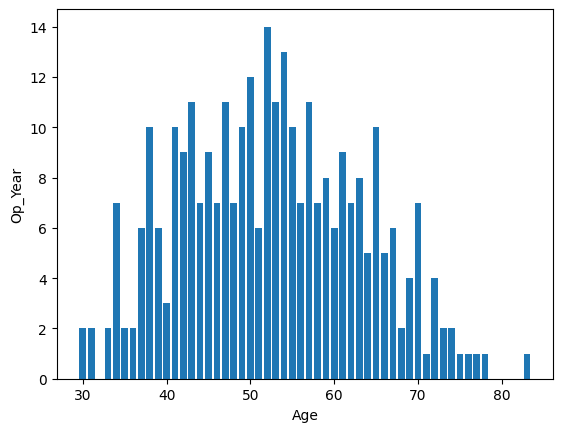

In [18]:
counter = Counter(data["Age"])
plt.bar(data["Age"].unique(),counter.values())
plt.xlabel("Age")
plt.ylabel("Op_Year")
plt.show()

2. pie chart to visualize number of Surv_status_5_years

<class 'dict'>


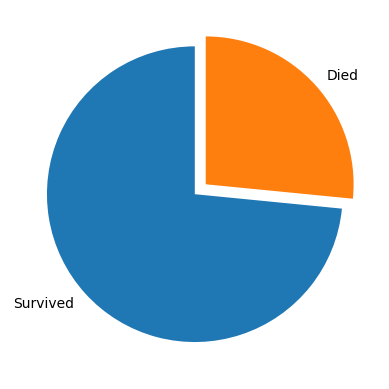

In [19]:
label = {1: "Survived", 2: "Died"}
print(type(label))
# Map unique values to the corresponding labels
labels = [label[val] for val in data["Surv_status_5_years"].unique()]
# Create pie chart
plt.pie(data["Surv_status_5_years"].value_counts(), labels=labels, startangle=90, explode=(0, 0.1))
plt.show()
